In [286]:
!which python

/home/krishbin/.local/software/miniconda3/envs/fuse/bin/python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
DATASET_URL = "dataset.csv"  
df = pd.read_csv(DATASET_URL)
print("Shape of Data", df.shape)
df.head()

Shape of Data (4920, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Disease'] = df['Disease'].map(lambda x: x.strip())
df.groupby('Disease').Disease.unique()

Disease
(vertigo) Paroymsal  Positional Vertigo    [(vertigo) Paroymsal  Positional Vertigo]
AIDS                                                                          [AIDS]
Acne                                                                          [Acne]
Alcoholic hepatitis                                            [Alcoholic hepatitis]
Allergy                                                                    [Allergy]
Arthritis                                                                [Arthritis]
Bronchial Asthma                                                  [Bronchial Asthma]
Cervical spondylosis                                          [Cervical spondylosis]
Chicken pox                                                            [Chicken pox]
Chronic cholestasis                                            [Chronic cholestasis]
Common Cold                                                            [Common Cold]
Dengue                                                   

In [23]:
symptoms = df[df.columns[1:]].values.flatten()
cleaned_symptoms = [x.strip() for x in symptoms if str(x) != 'nan']
unique_symptoms = list(set(cleaned_symptoms))

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

def cleanup_dataframe(df):
    (df_numrows, df_numcols) = df.shape
    col_names = df[df.columns[1:]].values.flatten()
    cleaned_col_names = [x.strip() for x in col_names if str(x) != 'nan']
    unq_col_names = list(set(cleaned_col_names))
    cleaned_dataframe = pd.DataFrame(columns=unq_col_names)
    for x in range(0,df_numrows):
        cur_symp = df.iloc[x].values[1:]
        cur_cleaned_symp = [x.strip() for x in cur_symp if str(x) != 'nan']
        col_val = np.zeros(shape=(len(unique_symptoms),),dtype=float)
        for y in cur_cleaned_symp:
            col_index = unique_symptoms.index(y)
            col_val[col_index] = 1
        cleaned_dataframe.loc[len(cleaned_dataframe)] = col_val
    return cleaned_dataframe

def get_train_test_df(y,cleaned_dataframe,test_size=0.3,random_state=100):
    X = cleaned_dataframe.values
    y = y
    return train_test_split(
        X,
        y,
        stratify=y,
        test_size=test_size,
        random_state=random_state
    )

def train_dataset(classifier,X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    return "Accuracy:"+ str(metrics.accuracy_score(y_test, pred))

In [25]:
testdata = df.sample(n=200)

In [26]:
testdata.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
2109,Peptic ulcer diseae,vomiting,indigestion,loss_of_appetite,abdominal_pain,passage_of_gases,internal_itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2027,Urinary tract infection,burning_micturition,bladder_discomfort,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Hepatitis B,itching,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN,NaN
1096,Pneumonia,chills,fatigue,cough,breathlessness,sweating,malaise,phlegm,chest_pain,fast_heart_rate,rusty_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,GERD,stomach_pain,acidity,vomiting,cough,chest_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cln_df = cleanup_dataframe(df)
cln_test_df = cleanup_dataframe(testdata)
y = df['Disease'].values

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
X_train, X_test, y_train, y_test = get_train_test_df(y,cln_df)
train_dataset(clf, X_train, X_test, y_train, y_test)

'Accuracy:1.0'

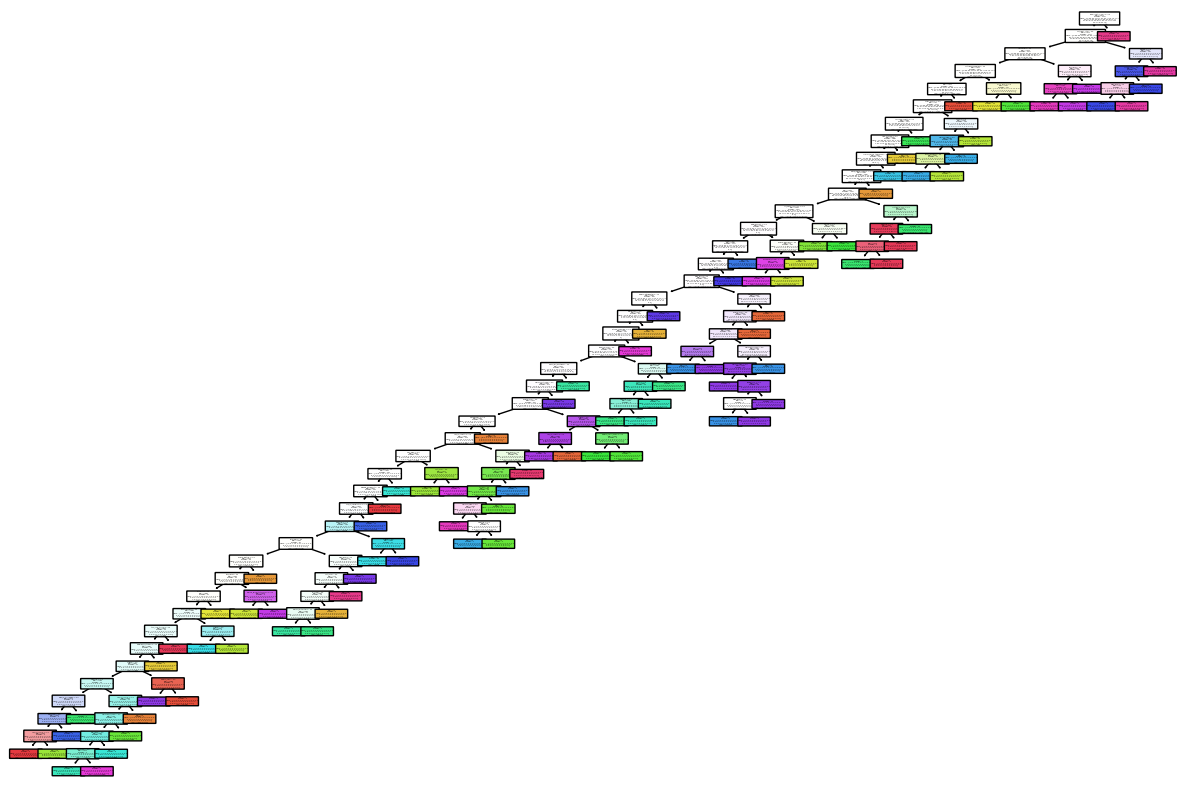

In [347]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0], 
          feature_names=cln_df.columns,
          class_names=df['Disease'].unique(), 
          filled=True, rounded=True)

plt.show()

In [391]:
from sklearn.tree import DecisionTreeClassifier
dectreeclf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = get_train_test_df(y,cln_df)
train_dataset(dectreeclf, X_train, X_test, y_train, y_test)

'Accuracy:1.0'

In [392]:
from sklearn.svm import SVC,SVR
svmclf = SVC()
X_train, X_test, y_train, y_test = get_train_test_df(y,cln_df)
train_dataset(svmclf, X_train, X_test, y_train, y_test)

'Accuracy:1.0'

In [431]:
a = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
clf.predict([a])

array(['Chronic cholestasis'], dtype=object)

In [433]:
dectreeclf.predict([a])

array(['Chronic cholestasis'], dtype=object)

In [434]:
svmclf.predict([a])

array(['Chronic cholestasis'], dtype=object)

In [435]:
a

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [436]:
df.iloc[35]

Disease       Chronic cholestasis
Symptom_1                 itching
Symptom_2                vomiting
Symptom_3          yellowish_skin
Symptom_4                  nausea
Symptom_5          abdominal_pain
Symptom_6       yellowing_of_eyes
Symptom_7                     NaN
Symptom_8                     NaN
Symptom_9                     NaN
Symptom_10                    NaN
Symptom_11                    NaN
Symptom_12                    NaN
Symptom_13                    NaN
Symptom_14                    NaN
Symptom_15                    NaN
Symptom_16                    NaN
Symptom_17                    NaN
Name: 35, dtype: object

In [397]:
df.groupby('Disease')['Disease'].unique()

Disease
(vertigo) Paroymsal  Positional Vertigo    [(vertigo) Paroymsal  Positional Vertigo]
AIDS                                                                          [AIDS]
Acne                                                                          [Acne]
Alcoholic hepatitis                                            [Alcoholic hepatitis]
Allergy                                                                    [Allergy]
Arthritis                                                                [Arthritis]
Bronchial Asthma                                                  [Bronchial Asthma]
Cervical spondylosis                                          [Cervical spondylosis]
Chicken pox                                                            [Chicken pox]
Chronic cholestasis                                            [Chronic cholestasis]
Common Cold                                                            [Common Cold]
Dengue                                                   

In [403]:
import xgboost as xgb
yval = df.index.values
X_train, X_test, y_train, y_test = train_test_split(
        cleaned_dataframe.values,
        yval,
        test_size=0.3,
        random_state=100
    )
xgbclf = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgbclf.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [409]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

X_train, X_test, y_train, y_test = train_test_split(X, yval, random_state=42)

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

accuracy_score(y_test, y_pred)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 3687 3688 3689], got [   0    1    2 ... 4914 4915 4918]

In [408]:
xgbclf.predict([a])

array([-12290.033], dtype=float32)